# Python pour le Machine Learning : SKLEARN


## 1. Train_test_split, Cross Validation, GridSearchCV

Je vais vous dévoiler les techniques pour entraîner un modèle, l'optimiser et l'évaluer avec la bonne méthodologie. 

Nous découvrirons comment créer un Trainset et un Testset à l'aide de la fonction $train_test_split()$. 

Ensuite, nous aborderons la validation d'un modèle grâce à la technique de $cross-validation$. 

Enfin, nous explorerons comment améliorer un modèle en utilisant $GridSearchCV$ et les courbes d'apprentissage.

## 2. Train_test_split

En machine learning, il ne faut jamais évaluer la performance de votre modèle sur les mêmes données qui ont servi à son entraînement... Pourquoi ? Eh bien, imaginez que vous entraîniez une machine sur des photos de chats, puis que vous l'évaluiez sur ces mêmes photos. C'est bien trop facile ! La machine reconnaîtra que ce sont des chats puisqu'elle a déjà vu ces images. 
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000034.png)


Ce qui est réellement intéressant, c'est de tester la machine sur des données qu'elle n'a jamais vues. Ainsi, on obtient une idée de sa performance potentielle en conditions réelles.
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000035.png)

Quand on pratique le machine learning, on divise toujours notre dataset en deux parties : un Trainset, utilisé pour entraîner le modèle, et un Testset, dédié exclusivement à l'évaluation du modèle. 

Généralement, on alloue 80% des données au Trainset et 20% au Testset. 
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000036.png)

On obtient alors des tableaux $X\_train$ et $y\_train$, qui seront utilisés dans la méthode $fit$ pour entraîner le modèle, et des tableaux $X\_test$ et $y\_test$, que l'on emploiera dans la méthode score pour évaluer le modèle.
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000037.png)

Pour réaliser cette division en Python, on utilise la fonction $train\_test\_split()$, issue du module $model_selection$. C'est d'ailleurs dans ce module que l'on retrouve toutes les fonctions clés.

J'ai ici importé le dataset des fleurs d'iris qui comporte 150 échantillons. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

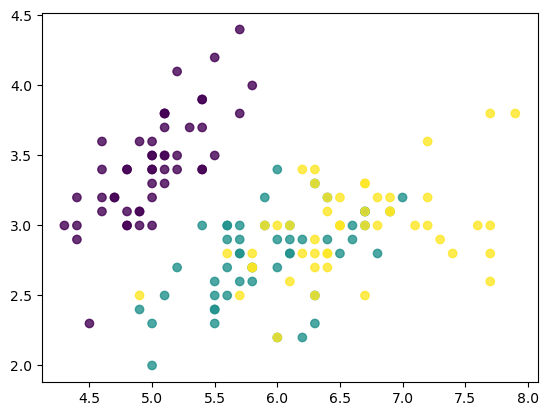

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

Pour diviser ce dataset, on importe la fonction $train\_test\_split$. 

In [3]:
from sklearn.model_selection import train_test_split

Ensuite, on crée les tableaux $X\_train$, $X\_test$, $y\_train$ et $y\_test$ en faisant passer les données $X$ et $y$ à travers cette fonction. 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Par la suite, on peut déterminer le pourcentage de données à attribuer au Trainset et au Testset. Par exemple, si je définis test_size = 0.5, cela signifie que 50% des données iront dans le Testset et les 50% restants dans le Trainset.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (75, 4)
Test set: (75, 4)


Si vous optez pour cette configuration, vous aurez 75 points dans le Trainset et 75 dans le Testset. Habituellement, on réserve 20% des données pour le Testset, d'où la valeur test_size = 0.2. 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Après cette division, voilà à quoi ressemblent notre Trainset et notre Testset. Si vous ne voyez pas exactement les mêmes points, c'est tout à fait normal. La fonction $train\_test\_split()$ mélange les données de manière aléatoire avant de les diviser. 

Text(0.5, 1.0, 'Test set')

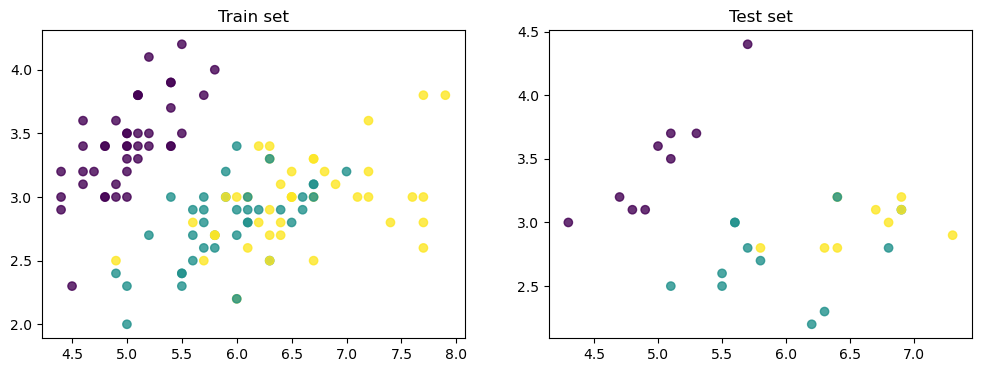

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set') 

Si vous souhaitez maîtriser cet aléatoire, vous pouvez définir l'argument random_state à une valeur fixe. 

Personnellement, je vais opter pour 5 dans ce tutoriel.

Text(0.5, 1.0, 'Test set')

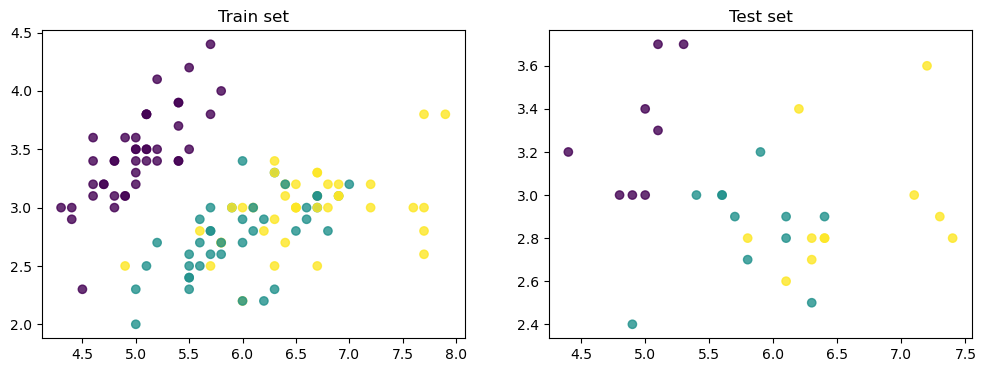

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set') 

Maintenant, il est temps d'entraîner un modèle de machine learning. 

Je vais créer un modèle KNeighborsClassifier avec le nombre de voisins fixé à 1 pour l'instant. 

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
model = KNeighborsClassifier(n_neighbors=1)

Pour entraîner notre modèle, on passe $X\_train$ et $y\_train$ à la méthode $fit()$. 

Si on évalue notre modèle sur ces mêmes données, on obtient un score parfait de 100%. 

In [11]:
model.fit(X_train, y_train)

print('train score:', model.score(X_train, y_train))

train score: 1.0


Mais est-ce que cela signifie que notre modèle réussira toutes ses prédictions à l'avenir? Évidemment, la réponse est non. 
C'est ce que nous avons démontré au début avec l'exemple des photos de chats. 

Pour obtenir une réelle idée de la performance future de notre modèle, il faut le tester sur les données du Testset, c'est-à-dire sur des données qu'il n'a jamais vues. 

In [12]:
print('test score:', model.score(X_test, y_test))

test score: 0.9


En faisant cela, on obtient un score de 90%.

## 3. Validation Set

Maintenant, vous savez comment entraîner et évaluer correctement un modèle de machine learning ! En tant que Data Scientist, votre rôle est d'améliorer ce modèle pour atteindre un score de 91, 92, voire 99%. 

Pour ce faire, vous devrez ajuster les hyperparamètres de votre modèle, un peu à la manière dont on tourne les boutons d'une radio pour capter le meilleur signal. 

Par exemple, si nous modifions le nombre de voisins en le fixant à 3, nous constatons alors un score de 93% sur les données du testset. Il y a une amélioration, c'est plutôt bien. 

In [13]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

print('test score:', model.score(X_test, y_test))

test score: 0.9333333333333333


Si maintenant nous testons avec un nombre de voisins égal à 6, le score atteint 96%.

In [14]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)

print('test score:', model.score(X_test, y_test))

test score: 0.9666666666666667


Cependant, si nous ajustons notre modèle en optimisant sa performance sur le testset, comme nous le faisons actuellement, nous ne pourrons plus utiliser les données du testset pour l'évaluation finale de notre modèle. 
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000039.png)

Pourquoi ? C'est ce que nous avons vu au début de la vidéo. Pour évaluer un modèle, il faut le confronter à des données qu'il n'a jamais rencontrées. Or, si nous ajustons notre modèle avec les données du testset, il aura indirectement été exposé à ces données, car il aura été calibré dessus.

C'est pourquoi on crée une troisième division dans notre dataset : le "validation set". 
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000040.png)

Cette division nous permet d'ajuster le modèle pour obtenir les meilleures performances tout en conservant les données du testset pour évaluer le modèle sur des informations qu'il n'a jamais vues. 

Ainsi, lorsque nous voulons comparer deux modèles de machine learning, comme un KNN avec 3 voisins et un autre avec 6 voisins, nous commencerons par les entraîner sur le Trainset. 

Nous choisirons ensuite celui qui performe le mieux sur le validation set. 
Finalement, nous évaluerons ce modèle sur le testset pour avoir une idée de sa performance réelle.
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000041.png)

Si vous avez compris cela, c'est excellent ! Vous avez presque tout saisi. Toutefois, une question demeure : comment pouvons-nous être sûrs que la manière dont nous avons divisé le dataset est la meilleure? 

Et si, en formant et validant nos modèles sur différentes portions de données, nous découvrions que c'est le modèle B qui est supérieur ? Dans ce cas, il existe une solution : la cross-validation.


## 4. Cross Validation

La Cross-validation consiste à entraîner puis à valider notre modèle sur plusieurs découpes possibles du trainset. 

Par exemple, si on découpe le trainset en 5 parties, nous pouvons entraîner notre modèle sur les 4 premières et le valider sur la cinquième. 

Ensuite, nous répétons cette opération pour toutes les configurations possibles. 

Au final, nous faisons la moyenne des 5 scores. De cette manière, lorsque nous souhaitons comparer deux modèles, nous sommes sûrs de choisir celui qui a, en moyenne, les meilleures performances.
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000042.png)

Il est à noter qu'il existe plusieurs méthodes pour découper le TrainSet avec la technique de cross-validation. Elles sont toutes détaillées sur le site de Sklearn, et celle que nous venons de voir s'appelle K-fold. 
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000043.png)


Pour réaliser cela en Python, nous importons la fonction $cross\_val\_score$. 

Dans cette fonction, il nous suffit de fournir notre modèle, nos données $X\_train$ et $y\_train$, ainsi que le nombre de découpes que nous souhaitons effectuer pour notre cross-validation, par exemple $cv=5$. 

Optionnellement, nous pouvons aussi spécifier la métrique que nous voulons utiliser pour évaluer notre modèle. Par défaut, ce sera la métrique associée à notre estimateur (comme l'$accuracy$ pour le KNN).

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')

array([1.        , 1.        , 1.        , 0.95833333, 0.95833333])

Nous pouvons choisir une autre métrique dans le module metrics. En exécutant cette fonction, nous obtenons 5 scores correspondant à nos 5 splits de cross-validation. Nous pouvons ensuite en calculer la moyenne.

In [17]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

Désormais, nous sommes en mesure d'évaluer différents modèles et de retenir celui qui présente la meilleure performance. Par exemple :

avec n_neighbors = 1, nous obtenons 97%

In [18]:
cross_val_score(KNeighborsClassifier(1), X_train, y_train, cv=5, scoring='accuracy').mean()

0.975

avec n_neighbors = 2, nous obtenons 96%

In [19]:
cross_val_score(KNeighborsClassifier(2), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

avec n_neighbors = 3, nous obtenons 97%

In [20]:
cross_val_score(KNeighborsClassifier(3), X_train, y_train, cv=5, scoring='accuracy').mean()

0.975

et avec n_neighbors = 4, nous obtenons 96%

In [21]:
cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

Pour gagner du temps, nous pourrions tester toutes ces configurations dans une boucle "for", en enregistrant chaque score dans une liste nommée validation_score. 

En affichant ensuite ces résultats avec Matplotlib, nous obtiendrions un certain graphique (voir graphique). Ce graphique nous montrerait que les meilleures performances sont obtenues avec un nombre de voisins aux alentours de 10.

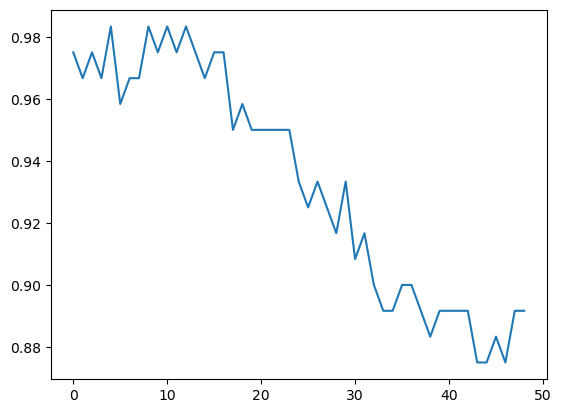

In [22]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)    

Mais savez-vous quoi? Vous n'avez même pas besoin d'écrire cette boucle "for". Il existe une fonction dans Sklearn qui génère ce type de graphiques. Elle s'appelle $validation_curve$.

## 5. Validation Curve

En utilisant la fonction de validation curve, nous avons fait passer le modèle que j'ai défini précédemment sur une nouvelle ligne, ainsi que nos données du TrainSet. 
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000044.png)

In [23]:
from sklearn.model_selection import validation_curve

Ensuite, dans une chaîne de caractères (string), nous indiquons le nom de l'hyper-paramètre $n_neighbors$ que nous souhaitons régler. 

Ensuite, sous forme d'itérateur $k$, nous désignons les différentes valeurs que nous voulons tester pour cet hyper-paramètre. 

Ici, j'ai créé un tableau Numpy allant de 1 à 50. 

Enfin, nous n'oublions pas de préciser le nombre de divisions que nous voulons dans notre cross-validation, $cv=5$. 

Cette fonction calcule alors tous les scores pour le trainset et tous les scores pour l'ensemble de validation.

In [24]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

param_name = 'n_neighbors'
param_range = k

train_score, val_score = validation_curve(model, X_train, y_train, param_name=param_name, param_range=param_range, cv=5)

En vérifiant les dimensions du tableau "validation score", nous obtenons 49 lignes pour les 49 valeurs que nous avons testées ici, et 5 colonnes pour les 5 partitions de notre cross-validation.

In [25]:
val_score.shape

(49, 5)

Pour obtenir le score moyen pour chaque validation croisée, il nous suffit de prendre la moyenne de chaque ligne, c'est-à-dire la moyenne le long de l'axe 1 de notre tableau Numpy. 

Nous obtenons ainsi un tableau qui contient simplement 49 éléments. 

In [26]:
val_score.mean(axis=1)

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.93333333,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

Nous pouvons afficher ce tableau à l'aide de Matplotlib, en utilisant les valeurs d'hyper-paramètres en abscisse (axe des x) et les scores en ordonnée (axe des y). Nous constatons que nous obtenons exactement le même graphique que précédemment.

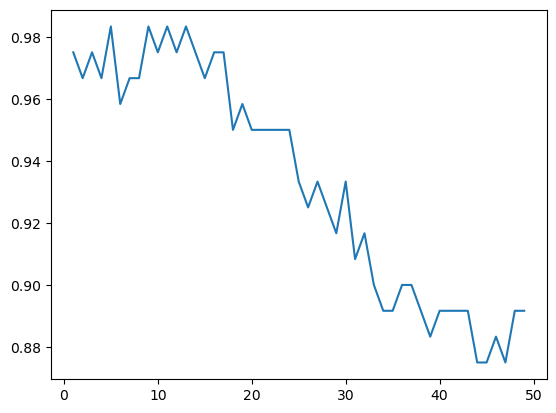

In [27]:
plt.plot(k, val_score.mean(axis=1))

En plus du score de validation, nous pouvons également observer le score sur le trainset. 

Pour cela, nous pouvons ajouter quelques lignes supplémentaires dans Matplotlib. Cela nous donne le résultat suivant, ce qui est très utile pour détecter les cas de surapprentissage. 

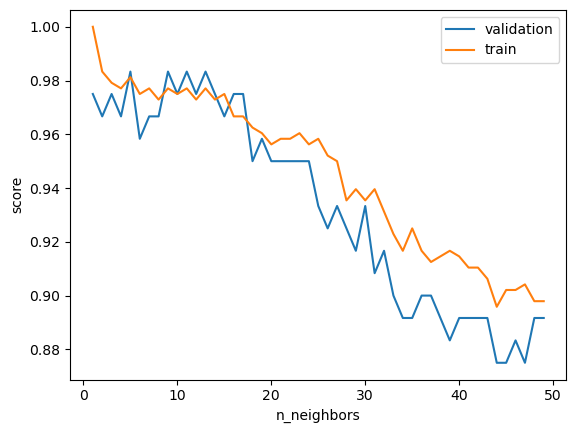

In [28]:
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()     

Le surapprentissage se produit lorsque la machine perd sa capacité de généralisation en cherchant à s'adapter trop précisément aux données du trainset. 

Nous pouvons donc identifier ce problème lorsque nous obtenons un très bon score d'entraînement mais un score moins bon sur la validation. 

En particulier, pour l'algorithme KNN, le surapprentissage se produit souvent lorsque le nombre de voisins est égal à 1.

![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000046.png)

En résumé, grâce à ce graphique, nous savons désormais que nous pouvons atteindre une performance de 98 % en choisissant la bonne valeur pour l'hyper-paramètre "n_neighbors". 

Cependant, dans l'algorithme KNN, il existe d'autres hyper-paramètres que le nombre de voisins. 

Par exemple, nous avons le choix du type de distance, comme la distance de Manhattan ou la distance euclidienne. 

Nous pouvons également décider d'accorder ou non des coefficients à nos distances. En ajustant ces autres hyper-paramètres, nous pourrions peut-être obtenir des performances encore meilleures.

Pour tester toutes ces combinaisons, il est préférable d'utiliser $GridSearchCV$.

## 5. GridSearchCV

GridSearchCV nous permet de trouver le modèle avec les meilleurs hyperparamètres en comparant les performances de chaque combinaison grâce à la technique de cross-validation.

![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000047.png)

On importe donc $GridSearchCV$ depuis le module $model\_selection$.

In [29]:
from sklearn.model_selection import GridSearchCV

Ensuite, on crée un dictionnaire qui contient les différents hyperparamètres à régler, ainsi que chaque valeur à tester pour ces hyperparamètres.

In [30]:
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

On fait ensuite passer notre type de modèle dans la fonction GridSearchCV, ainsi que le dictionnaire que nous venons de créer et un nombre pour notre cross-validation, par exemple 5.

In [31]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

Au final, nous obtenons une grille qui contient plusieurs estimateurs. Nous allons donc entraîner cette grille avec la méthode fit, comme s'il s'agissait d'un estimateur, en passant bien évidemment les données du trainset.

In [32]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

Une fois l'entraînement terminé, on peut voir le modèle qui a obtenu le meilleur score, qui est de 98%.

In [33]:
print(grid.best_score_)

0.9833333333333334


On peut également voir les meilleurs paramètres de ce modèle. Ainsi, le meilleur modèle utilise des distances euclidiennes avec un nombre de voisins égal à 5.

In [34]:
print(grid.best_params_)

{'metric': 'euclidean', 'n_neighbors': 5}


Et pour finir, on peut sauvegarder ce modèle (code) pour ensuite tester ce modèle sur les données $x\_test$ et $y\_test$ afin d'avoir un aperçu de sa performance dans la vraie vie. 

On obtient ainsi un score de 93% de réussite.

In [35]:
model = grid.best_estimator_
model.score(X_test, y_test)    

0.9333333333333333

À ce stade, on peut utiliser une autre mesure pour évaluer la performance de notre modèle, par exemple en utilisant la fonction $confusion\ matrix$ qui nous vient du module metrics.
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000048.png)

Dans cette fonction confusion matrix, on fait passer nos vraies données $y_test$, c'est-à-dire celles qu'on est censé obtenir, c'est-à-dire $modèle.predict(X_test)$.

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

On obtient donc une matrice carrée. Ici, elle a une dimension de 3 x 3 car nous avons 3 classes de fleurs dans notre dataset.

On peut voir que les 8 fleurs de la classe 1 que l'on retrouve dans les données de test ont bien été classées dans cette classe. En revanche, parmi les 11 fleurs de la classe numéro 2, seulement 9 d'entre elles ont été correctement classées dans la classe 2, et 2 parmi ces 11 fleurs ont été rangée dans la classe numéro 3.

Enfin, on voit que dans la classe 3, on avait également 11 fleurs, et elles ont toutes été correctement classées dans la classe numéro 3.

La fonction Confusion Matrix est une métrique extrêmement utile pour mieux comprendre où se trouvent les erreurs dans votre modèle.

Voilà ! Vous connaissez maintenant la méthode complète pour entraîner, optimiser et évaluer un modèle de machine learning. 

À présent, on pourrait se demander si notre modèle pourrait avoir de meilleures performances s'il disposait de davantage de données. 

Pour répondre à cette question très importante, il est nécessaire de tracer ce qu'on appelle les courbes d'apprentissage.

## 6. Courbes d'apprentissages (Learning Curve)

Les courbes d'apprentissage montrent l'évolution des performances du modèle en fonction de la quantité de données qu'on lui fournit. Typiquement, plus la machine dispose de données pour s'entraîner, meilleure sera sa performance. 
![Python_Seaborn_Fig_000050.png](./images/Python_Seaborn_Fig_000050.png)

Mais vous savez... la performance finit toujours par atteindre un plafond, c'est normal ! Et quand c'est le cas, c'est inutile d'avoir plus de données. Donc, il vaut mieux économiser son argent, arrêter de récolter des données et comprendre que notre modèle ne pourra pas avoir de meilleures performances. 

Pour faire cela dans Python, on va utiliser la fonction $learning\_curves$. Comme d'habitude, on fait passer notre modèle, $X\_train$, $y\_train$, un nombre de décompositions pour la cross-validation et, pour finir, on va entrer les quantités de données à utiliser pour l'entraînement. 
![Python_Seaborn_Fig_000051.png](./images/Python_Seaborn_Fig_000051.png)

Mais c'est un peu subtil, parce qu'on va en fait passer des pourcentages ! Le plus souvent, on va utiliser la fonction linspace() de Numpy en indiquant un pourcentage de début (exemple 0.1) et un pourcentage de fin (exemple 100%), ainsi qu'un nombre de lots qu'on veut avoir, par exemple 5. 
![Python_Seaborn_Fig](./images/Python_Seaborn_Fig_000052.png)

Donc, juste à titre de démonstration, si j'exécute ce code

In [38]:
np.linspace(0.2, 1.0, 5)

array([0.2, 0.4, 0.6, 0.8, 1. ])

Je vais obtenir les pourcentages 0.2, 0.4, 0.6, etc. 

Ça veut dire que si mon dataset contient 100 exemples, alors j'aurai 20 points dans le premier lot, puis 40 points dans le second, 60 dans le troisième, etc. Ces différentes quantités, on va les retrouver dans la variable N qui nous est retournée par la fonction learning_curves. 

In [39]:
from sklearn.model_selection import learning_curve

In [40]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes= np.linspace(0.2, 1.0, 5) , cv=5)

print(N)

[19 38 57 76 96]


En l'occurrence, on voit que si on découpe x_train et y_train avec ces différents pourcentages, on va obtenir dans notre premier lot 19 points, puis 38, 57, etc. 

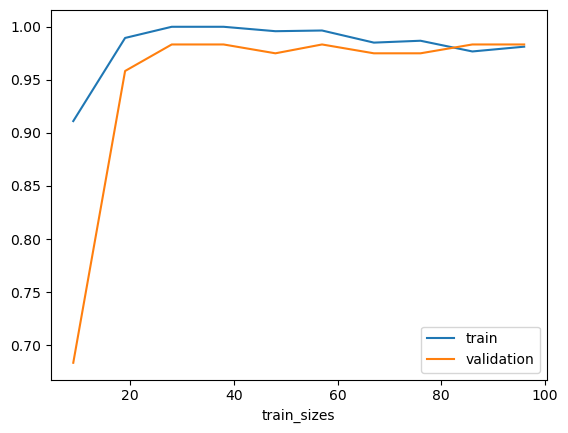

In [41]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes= np.linspace(0.1, 1.0, 10) , cv=5)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

Et voilà donc le graphique que l'on obtient en faisant des learning curves de 10% jusqu'à 100%. On peut voir que la performance n'évolue presque plus à partir du moment où on a plus de 60 points dans notre dataset. Donc, ça nous montre que le modèle va continuer à stagner. Il est très peu probable qu'on obtienne de meilleures performances en ayant plus de points. 

C'est une information très importante parce que récolter des données dans le monde réel, ça coûte cher, et vous ne voulez pas dépenser de l'argent pour quelque chose qui ne va pas améliorer votre modèle.

Voilà ! Vous savez à présent tout ce qu'il y a à savoir concernant l'entraînement, l'optimisation, la validation et l'évaluation finale d'un modèle. 

Pour résumer, 
- commencez toujours par diviser votre dataset avec la fonction train_test_split(). 
- Ensuite, vous pouvez utiliser l'optimisateur GridSearchCV pour trouver les meilleurs hyperparamètres pour votre modèle. Cette technique utilise la cross-validation, donc pensez à bien définir un nombre de splits et, optionnellement, à définir la stratégie de découpage qui vous intéresse. 
- Pour évaluer votre modèle, vous pouvez charger n'importe quelle métrique depuis le module metrics et, 
- pour finir, pensez à utiliser les courbes de validation et les courbes d'apprentissage pour vérifier si vous n'êtes pas en overfitting et pour vérifier si vous pouvez encore améliorer votre modèle avec plus de données.

## 7. Exercices

Dans la dernière leçon, nous avons travaillé sur le dataset du Titanic. 

Nous avions développé un algorithme de KNN et je vous avais demandé d'écrire un code pour trouver le meilleur nombre de voisins possible pour notre algorithme, celui qui nous donne les meilleures performances. Pour cela, il suffisait d'écrire une boucle $FOR$ pour explorer un nombre de voisins allant de 1 jusqu'à 30, de l'évaluer, et d'enregistrer le résultat dans une liste initialement vide. 

Ensuite, lorsque le meilleur score (initialement fixé à 0) est inférieur à notre nouveau score, nous remplaçons la valeur de $best\_k$ par $k$ et la valeur de $best\_score$ par notre nouveau $score$. On obtient alors la courbe de performance où l'on peut observer que le meilleur nombre de voisins pour notre algorithme est de 2. 

Évidemment, avec tout ce que nous avons abordé dans cette leçon, vous savez maintenant que cette approche n'est pas la meilleure. 
- Il faudrait plutôt commencer par créer un trainset et un testset pour entraîner et évaluer notre modèle. 
- Ensuite, avec GridSearchCV, nous pourrions trouver les meilleurs hyperparamètres. 
- Et enfin, grâce aux learning_curves, nous pourrions déterminer si la collecte de données supplémentaires serait bénéfique. 

Je vous suggère de réaliser ces différentes étapes sur le dataset Titanic.

## 8. Différents types de Cross Validation

Rappelez-vous, nous avons parlé de la cross-validation dans la leçon "Python spécial machine learning" qui abordait la sélection de modèles. 

Je vous avais dit qu'il existe plusieurs types de cross-validation : il y a le K-Fold, le Stratified K-Fold, et aussi le Group K-Fold. 
![Python_Seaborn_Fig_000053.png](./images/Python_Seaborn_Fig_000053.png)

Dans cette leçon, je vais vous montrer comment mettre en œuvre ces différentes techniques en Python. 

Je vais également utiliser un jeu de cartes pour illustrer et décrire ces différentes stratégies afin que vous compreniez bien comment les données sont découpées lorsque l'on utilise une cross-validation. 

Imaginez qu'un paquet de cartes représente votre dataset. Supposons que nous ayons deux classes dans notre dataset : une classe avec des cartes noires et une classe avec des cartes rouges. Pour illustrer, nous utilisons des cartes, mais cela pourrait représenter n'importe quoi : par exemple, différentes personnes, certaines ayant malheureusement un cancer et d'autres non, ou encore des emails, certains étant des spams et d'autres non. 

Lorsque nous faisons du machine learning, la première étape consiste à diviser notre dataset en trainset et testset. Par exemple, nous pourrions découper 20% pour le testset et les 80% restants pour le trainset. 

Mais, si nous divisons notre dataset ainsi, nous pourrions nous retrouver uniquement avec des cartes rouges, ce qui n'est pas idéal. C'est pourquoi il est essentiel de mélanger notre jeu de cartes avant de diviser, ce que l'on fait via l'argument $shuffle$ dans la fonction $train\_test<_split$. Par défaut, la valeur est $True$, ce qui signifie que le mélange sera effectué avant la division. 

Une fois les cartes mélangées, nous pouvons les diviser, mettons 20% pour le testset et 80% pour le trainset. 

Habituellement, nous utilisons les données du testset uniquement pour l'évaluation finale. Lorsque nous voulons valider un modèle de machine learning, nous utilisons une autre portion du trainset, que nous appelons le validation set. Comme nous l'avons vu dans la dernière leçon, si nous n'avons pas de chance, le validation set pourrait n'avoir que des cartes rouges. 

La technique de cross-validation consiste donc à effectuer plusieurs divisions, par exemple quatre, puis à former et à valider notre modèle successivement sur ces splits. Par exemple, nous formons d'abord le modèle sur trois des quatre groupes, puis nous le validons sur le quatrième, et ainsi de suite. 

Toutefois, cette technique de cross-validation n'est généralement pas utilisée dans le deep learning pour deux raisons principales. 
- La première est que, avec des millions de données à disposition, il est improbable que nous n'ayons que des cartes rouges dans notre dataset. 
- La seconde est que former un modèle peut prendre des heures, donc multiplier ce temps par le nombre de splits n'est pas pratique. 
Dans la pratique, vous ne verrez donc pas souvent de cross-validation dans le deep learning. Généralement, nous nous contentons d'un trainset et d'un testset, voire parfois pas de jeux de validation. 

Après cette digression, je vais vous présenter les différentes stratégies de cross-validation. 

### 8.1 La première, et la plus courante, est le K-Fold. 

Elle consiste 
1. à mélanger d'abord nos données, ce que nous faisons systématiquement, 
2. puis à les diviser en k sections égales et complémentaires. 
3. Par la suite, nous formons notre modèle sur k-1 de ces sections et validons sur la section restante, en alternant les sections utilisées pour la validation. 

En Python, c'est simple : commencez par importer KFold du module model_selection. 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


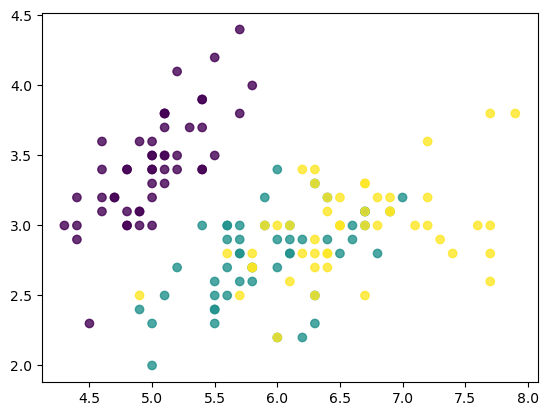

In [43]:
irid = load_iris()

X = iris.data
y =  iris.target

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Une fois fait, définissez votre CV en instanciant KFold avec le nombre de splits désiré et éventuellement un état aléatoire pour la répartition. 

In [45]:
cv = KFold(5, shuffle = True, random_state = 0)

Vous pouvez ensuite utiliser la fonction cross_val_score pour effectuer la cross-validation sur vos données.

In [46]:
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([0.96666667, 0.9       , 1.        , 1.        , 0.93333333])

### 8.2 Leave one out

Alors, quand on utilise la technique du k-fold, il existe un cas extrême dans lequel le nombre de splits sera égal au nombre d'échantillons que nous avons dans notre set. C'est ce que l'on appelle "leave-one-out". 

Cela signifie 
1. qu'on va prendre un échantillon, le sortir, entraîner notre modèle sur le reste des échantillons et le valider sur cet échantillon isolé. 
2. Une fois cette étape accomplie, on remet cet échantillon dans le dataset et on passe au suivant, 
3. et ainsi de suite. 

Pour réaliser cela, on pourrait remplacer le chiffre 5 par le nombre total d'échantillons, mais la meilleure manière est d'importer leave-one-out depuis le module "model_selection" et de remplacer k-fold par un itérateur leave-one-out. 

En exécutant cela, on obtient toujours soit un score de 100% soit 0% car on évalue toujours sur un seul échantillon. 

In [47]:
from sklearn.model_selection import LeaveOneOut

In [48]:
cv = LeaveOneOut()
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

L'avantage majeur de cette technique est sa précision, mais elle nécessite beaucoup de puissance de calcul. C'est utile à connaître pour la culture générale. 

Un inconvénient du k-fold est que s'il y a un déséquilibre dans la distribution des classes dans le dataset, on risque de ne pas avoir certaines classes dans certains splits. Dans ces cas, il est préférable d'utiliser la version stratifiée du k-fold. 

### 8.3 ShuffleSplit

La technique du k-fold est très efficace, en particulier pour les régressions où la notion de classe n'est pas pertinente. Une autre technique est le "shuffle split", qui consiste à mélanger le dataset, définir une portion pour l'entraînement et une autre pour la validation, entraîner le modèle, puis répéter le processus autant de fois que souhaité. 

Dans Python, on va importer "shuffle split". 

Ensuite, à l'intérieur de notre "cross_validation", on va utiliser "shuffle split" et définir un nombre de "splits" que l'on souhaite, par exemple, cela pourrait simplement être 4 splits. 

Puis, on définira une proportion que l'on souhaite avoir dans notre taille de test, exactement comme lorsque l'on utilise la fonction "train_test_split". Si l'on souhaite avoir 20%, on écrira 0.2 ; pour 50%, on écrira 0.5. Donc, ensuite, on indiquera "test_size" égal à, par exemple, 0.2. 

In [49]:
from sklearn.model_selection import ShuffleSplit

In [50]:
cv = ShuffleSplit (4, test_size=0.2)
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([0.96666667, 0.96666667, 0.93333333, 0.96666667])

Si j'exécute ce code, cela me donne quatre scores puisque j'ai effectué cette opération de mélange et découpage quatre fois. 

Au passage, une remarque sur cette technique similaire à celle faite sur le k-fold : si les classes dans le dataset sont déséquilibrées, par exemple, si une très petite portion de mes données appartient à la classe 0 et que la majorité appartient à la classe 1, en mélangeant et en découpant, je risque de me retrouver avec un split sans aucune donnée de la classe 0 pour l'entraînement, ce qui n'est pas idéal. 

Pour éviter ce problème, on utilise la version stratifiée du k-fold.

### 8.4 STRATIFIED K-FOLD

Cette technique est souvent le choix par défaut. C'est un choix assez sûr qui fonctionne généralement très bien en machine learning. 

Cela consiste à créer des "splits" dans lesquels on aura, à chaque fois, une petite portion de chacune de nos classes. 
![Python_Seaborn_Fig_000054.png](./images/Python_Seaborn_Fig_000054.png)

Vous voyez une classe bleue, une classe beige, et une classe marron. 
Pour le split 0, on va prendre une petite portion de la classe bleue, une portion proportionnelle de la classe beige, et enfin une petite portion de la classe marron. 

Si l'on voulait faire cela avec des cartes, il faudrait d'abord créer ce qu'on appelle des strates. La machine va trier nos différentes classes, par exemple, regrouper toutes les rouges ensemble, et tous les noirs ensemble. Une fois cela fait, elle va nous demander combien de "cross-validations", c'est-à-dire combien de splits, nous désirons. 

Supposons que nous en voulions quatre, comme illustré à l'écran : 0, 1, 2, 3. La machine découpera cela en quatre portions égales. Elle procédera de la même façon pour les cartes de la classe 0 ou de la classe 1. 

Puis, elle regroupera les deux, nous donnant ainsi nos quatre splits de cross-validation, où l'on retrouvera une certaine proportion des deux classes : la classe 1 et la classe 0. 

Pour faire cela dans Python, on utilise "StratifiedKFold" pour importer ce générateur. 
Ensuite, on remplace "cv" (ou notre "shuffle_split") par "StratifiedKFold", au sein duquel on indiquera simplement le nombre de splits souhaités, par exemple, quatre. Ainsi, une fois encore, on obtient quatre scores.

In [51]:
from sklearn.model_selection import StratifiedKFold

In [52]:
cv = StratifiedKFold (4)
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([0.97368421, 0.94736842, 0.94594595, 1.        ])

### 8.5 Group K-FOLD

Pour finir, je vais vous parler du "GroupKFold". Ils sont très importants à connaître en machine learning. Dans les études statistiques, on travaille souvent avec des datasets dans lesquels nos variables ou nos échantillons sont tous indépendants les uns des autres et sont tirés de la même distribution. 

Si vous avez un dataset avec des appartements et le prix de ces appartements, vous pouvez facilement dire que le prix d'un appartement ne va pas dépendre du prix d'un autre appartement. Ce n'est pas parce que vous avez un appartement à Paris qui vaut cinq cent mille euros que l'appartement à Lyon coûtera forcément deux cent mille euros. Les deux choses sont complètement indépendantes. 

Cependant, en machine learning et en data planning, il arrive qu'on travaille sur un projet où nos données dépendent les unes des autres. Par exemple, un dataset analysant différents patients pour voir s'ils ont un cancer. Si on détecte que beaucoup de personnes d'une même famille ont un cancer, on pourrait considérer un facteur génétique. Cette personne, en faisant partie de cette famille, a donc plus de chances de développer un cancer. 

Il est alors important de faire notre cross-validation en prenant en compte certains groupes influents dans notre dataset. Par exemple, en créant des groupes selon les symboles d'un jeu de cartes : trèfles, piques, carreaux ou cœurs. Une fois nos quatre groupes créés, on va définir un nombre de splits pour notre cross-validation, disons trois. Ainsi, on aura trois groupes de trèfles, piques, carreaux et cœurs. Ensuite, on rassemblera ces différents groupes pour créer nos différents sets de cross-validation.

Pour faire cela avec Python, on commence par charger le générateur "GroupKFold". Il existe aussi "GroupShuffleSplit" pour faire la même chose : au lieu de créer des "k-folds", on va créer nos groupes, les mélanger, créer des splits, etc. 

Ici, on choisit "GroupKFold". Tout ce qu'on a à faire ensuite, c'est de remplacer "cv" par "GroupKFold", indiquer le nombre de splits souhaités, par exemple cinq, puis utiliser la méthode "get_n_splits", passant nos données X, y et les différents groupes souhaités. Par exemple, si j'avais un dataset des fleurs d'iris, je pourrais passer les différentes classes de fleurs en tant que groupes.

In [53]:
from sklearn.model_selection import GroupKFold

Si j'exécute ce code, cela me donne les résultats de cross-validation.

In [54]:
cv = GroupKFold(5).get_n_splits(X, y, groups=X[:, 0])
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])